In [1]:
import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf

import auxiliaries as aux

In [2]:
species = 'Deer'
file_name = 'GSM02927'
temperature_window = aux.TemperatureWindow(input_width=aux.OUT_STEPS,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS,
                               cv_name=f'{species}/{file_name}')

In [4]:
autoregressive_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS, num_vars=1)

history = aux.compile_and_fit(autoregressive_model, temperature_window)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 100s 210ms/step - loss: 0.7657 - mean_absolute_error: 0.7175 - mean_squared_error: 0.7657 - val_loss: 1.1563 - val_mean_absolute_error: 0.8826 - val_mean_squared_error: 1.1563
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.4640 - mean_absolute_error: 0.5518 - mean_squared_error: 0.4640 - val_loss: 0.8276 - val_mean_absolute_error: 0.7328 - val_mean_squared_error: 0.8276
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.4472 - mean_absolute_error: 0.5423 - mean_squared_error: 0.4472 - val_loss: 0.8222 - val_mean_absolute_error: 0.7290 - val_mean_squared_error: 0.8222
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.4372 - mean_absolute_error: 0.5368 - mean_squared_error: 0.4372 - val_loss: 0.7055 - val_mean_absolute_error: 0.6716 - val_mean_squared_error: 0.7055
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.4358 - mean_absolute_error: 0.5362 - mean_squared_error: 0.4358 - val_loss: 0.8954 - val_mea

In [5]:
next(iter(temperature_window.test))

(<tf.Tensor: shape=(32, 100, 1), dtype=float32, numpy=
 array([[[-0.6634602 ],
         [-0.85059   ],
         [-1.2248496 ],
         ...,
         [-0.47633037],
         [-1.2248496 ],
         [-1.0377197 ]],
 
        [[-0.85059   ],
         [-1.5991092 ],
         [-1.7862389 ],
         ...,
         [-1.0377197 ],
         [-1.5991092 ],
         [-2.3476284 ]],
 
        [[ 0.27218878],
         [ 0.08505899],
         [-0.10207079],
         ...,
         [-1.7862389 ],
         [-1.4119793 ],
         [-1.5991092 ]],
 
        ...,
 
        [[-1.0377197 ],
         [-0.6634602 ],
         [-0.85059   ],
         ...,
         [-0.10207079],
         [-0.6634602 ],
         [-1.0377197 ]],
 
        [[-1.2248496 ],
         [-1.9733688 ],
         [-0.85059   ],
         ...,
         [-0.6634602 ],
         [ 0.83357817],
         [ 0.27218878]],
 
        [[-1.4119793 ],
         [ 0.27218878],
         [-0.85059   ],
         ...,
         [ 0.45931858],
         [ 0.45

In [6]:
autoregressive_model.evaluate(temperature_window.test, verbose=1, return_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6632 - mean_absolute_error: 0.6329 - mean_squared_error: 0.6632 


{'loss': 0.6585053205490112,
 'mean_absolute_error': 0.630575954914093,
 'mean_squared_error': 0.6585053205490112}

In [7]:
df = temperature_window.create_df_extension(species, autoregressive_model, 20)

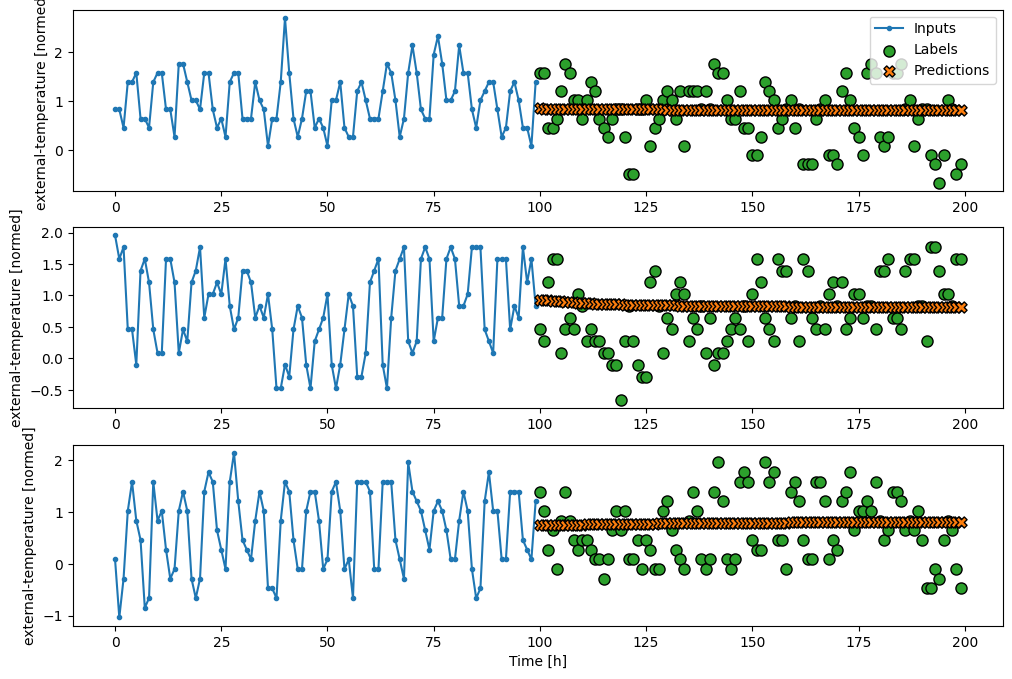

In [8]:
temperature_window.plot(autoregressive_model)

<Axes: xlabel='timestamp'>

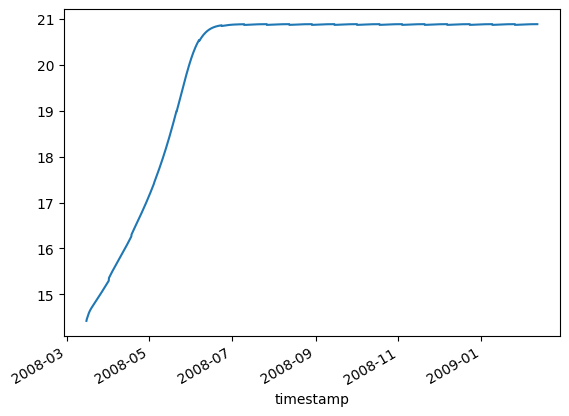

In [9]:
df[df['modeled'] == True]['external-temperature'].plot()

In [11]:
for i in range(len(df[df['modeled'] == True])):
    print(df[df['modeled'] == True].iloc[i, 0])

14.424610448690702
14.452494993117131
14.466535847374804
14.481838679209666
14.497698125334317
14.513567764109766
14.529115060303663
14.544143009087259
14.55854124316361
14.57225975483973
14.585289625546164
14.597648851681985
14.609375337167355
14.62051542671138
14.631123746551944
14.641256356268444
14.650968359879272
14.660311994719777
14.669336472182101
14.678085907332992
14.686600592995143
14.69491556640568
14.703062998118687
14.711069484582351
14.718957959260969
14.726749444496818
14.73446129964829
14.742107380350069
14.749701064456326
14.757252226097528
14.76477010236346
14.772262019221888
14.779734824860062
14.78719345634322
14.79464157665524
14.80208444138169
14.809524439425102
14.816964278208346
14.824404913292435
14.831850485441754
14.839300994656304
14.846757874277605
14.854222079866668
14.861694726244675
14.869176291192133
14.876668048790389
14.884170158299616
14.891682141939304
14.899205592311144
14.906740509415133
14.914286256210596
14.921843947518717
14.929413105558988
14